In [5]:
# importación y lectura de datos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vgsales.csv')

print("Head:\n", df.head())
print("\nTail:\n", df.tail())
print("\nSample:\n", df.sample(5, random_state=1))
print("\nDescripción:\n", df.describe(include='all'))

print("\nColumnas numéricas:", df.select_dtypes(include='number').columns.tolist())


Head:
    Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  

Tail:
         Rank                                              Name Platform  \
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   


In [6]:
#Totales generales
total_juegos = df['Name'].nunique()
total_generos = df['Genre'].nunique()
total_plataformas = df['Platform'].nunique()

print(f" Total de videojuegos: {total_juegos}")
print(f" Total de géneros: {total_generos}")
print(f" Total de plataformas: {total_plataformas}")


 Total de videojuegos: 11493
 Total de géneros: 12
 Total de plataformas: 31


In [7]:
# Ventas por año y por región

ventas_por_anio = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print("\nVentas por año:\n", ventas_por_anio)



Ventas por año:
         NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year                                                           
1980.0     10.59      0.67      0.00         0.12         11.38
1981.0     33.40      1.96      0.00         0.32         35.77
1982.0     26.92      1.65      0.00         0.31         28.86
1983.0      7.76      0.80      8.10         0.14         16.79
1984.0     33.28      2.10     14.27         0.70         50.36
1985.0     33.73      4.74     14.56         0.92         53.94
1986.0     12.50      2.84     19.81         1.93         37.07
1987.0      8.46      1.41     11.63         0.20         21.74
1988.0     23.87      6.59     15.76         0.99         47.22
1989.0     45.15      8.44     18.36         1.50         73.45
1990.0     25.46      7.63     14.88         1.40         49.39
1991.0     12.76      3.95     14.78         0.74         32.23
1992.0     33.87     11.71     28.91         1.65         76.16
1993.0     15.12      

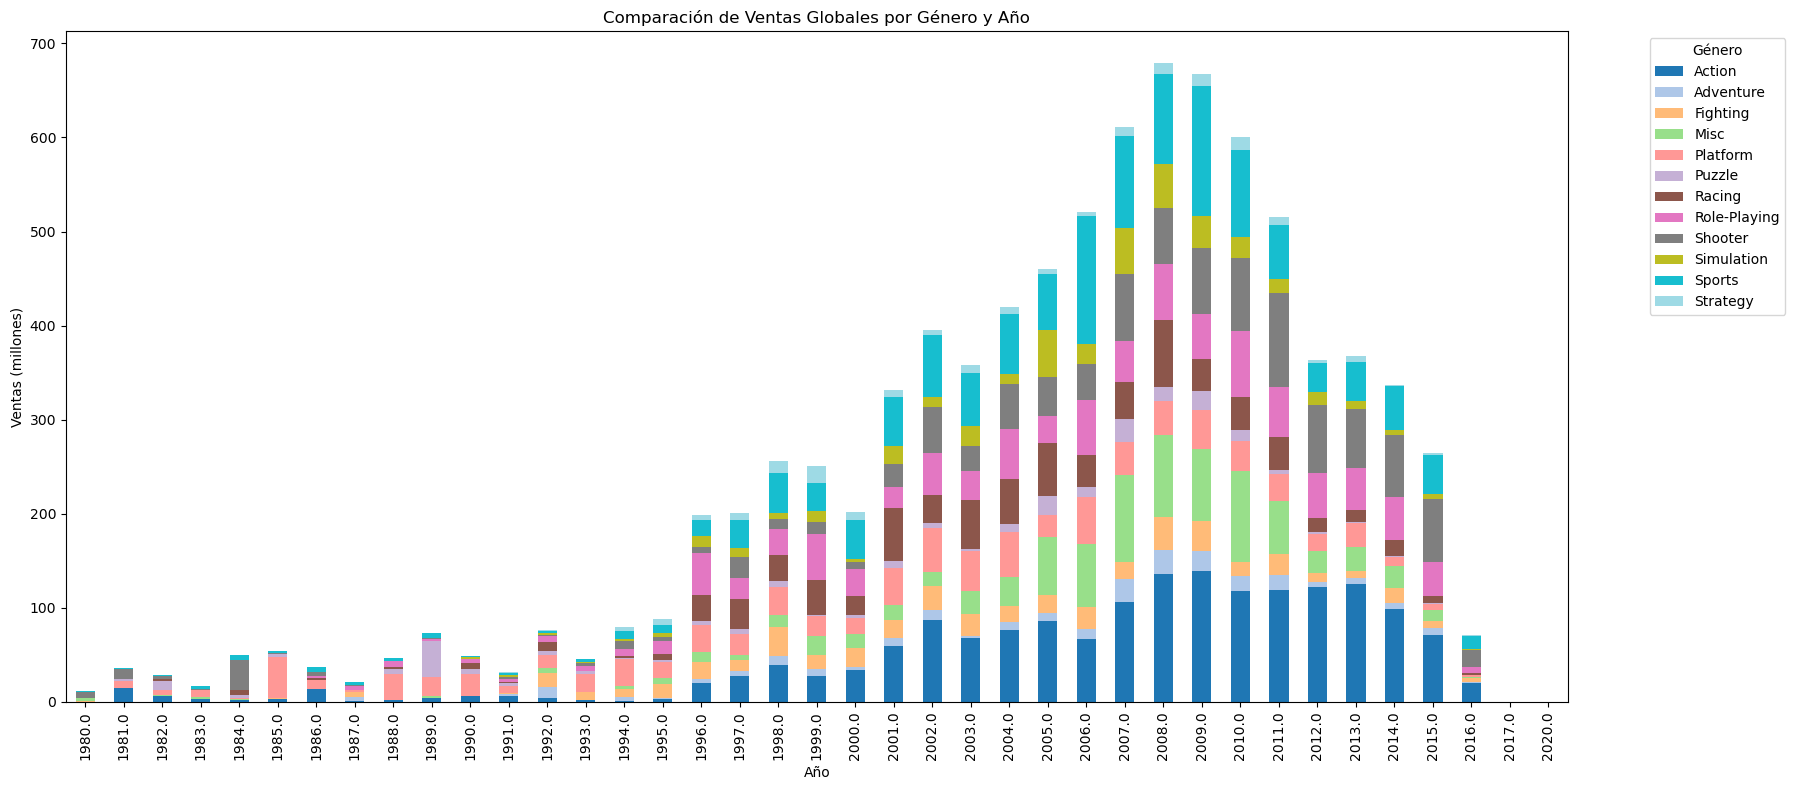

In [8]:
# Comparación de ventas entre géneros por año
ventas_genero_anio = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)

ventas_genero_anio.plot(kind='bar', stacked=True, figsize=(18, 8), colormap='tab20')
plt.title('Comparación de Ventas Globales por Género y Año')
plt.xlabel('Año')
plt.ylabel('Ventas (millones)')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


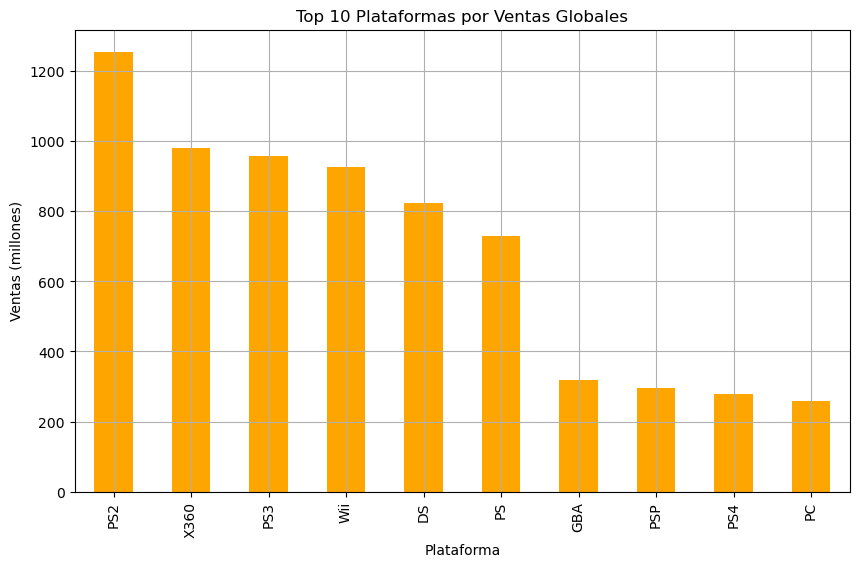

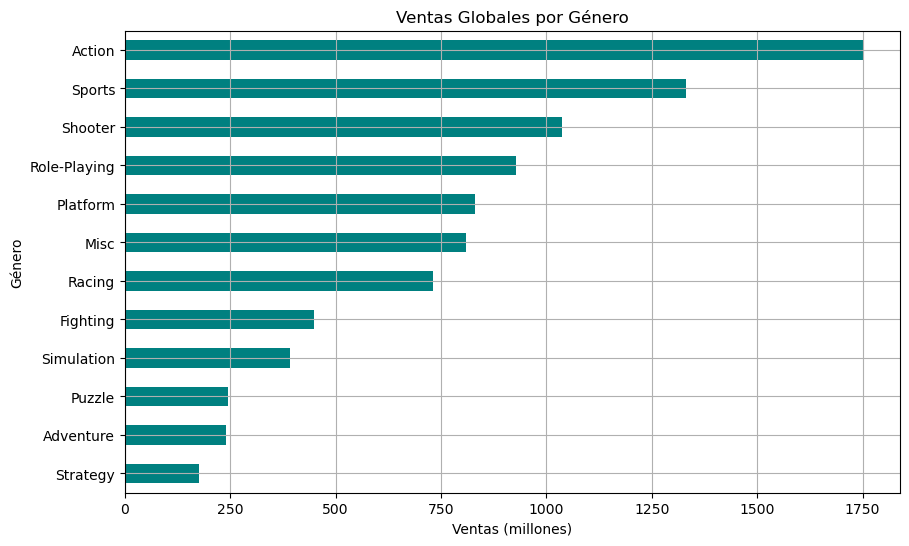

In [9]:
# Insights adicionales graficos

# Top 10 plataformas con mayores ventas
top_plataformas = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_plataformas.plot(kind='bar', figsize=(10,6), color='orange')
plt.title('Top 10 Plataformas por Ventas Globales')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.grid(True)
plt.show()

# Distribución de géneros por total de venta
genero_ventas = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=True)
genero_ventas.plot(kind='barh', figsize=(10,6), color='teal')
plt.title('Ventas Globales por Género')
plt.xlabel('Ventas (millones)')
plt.ylabel('Género')
plt.grid(True)
plt.show()


In [13]:
# crecimiento en últimos 4 años (2017-2020)
ultimos_4_anios = df[df['Year'] >= 2017]

# Género con mayor y menor crecimiento
crecimiento_genero = ultimos_4_anios.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print(" Crecimiento por Género:\n", crecimiento_genero)

# Plataforma con mayor y menor crecimiento
crecimiento_plataforma = ultimos_4_anios.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
print("\n Crecimiento por Plataforma:\n", crecimiento_plataforma)

# Juego con mayor y menor crecimiento
crecimiento_juego = ultimos_4_anios.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)
print("\n Videojuegos más vendidos en los últimos 4 años:\n", crecimiento_juego.head(5))
print("\n Videojuegos con menos ventas en los últimos 4 años:\n", crecimiento_juego.tail(5))


 Crecimiento por Género:
 Genre
Simulation      0.29
Role-Playing    0.04
Action          0.01
Name: Global_Sales, dtype: float64

 Crecimiento por Plataforma:
 Platform
DS     0.29
PS4    0.03
PSV    0.02
Name: Global_Sales, dtype: float64

 Videojuegos más vendidos en los últimos 4 años:
 Name
Imagine: Makeup Artist                              0.29
Phantasy Star Online 2 Episode 4: Deluxe Package    0.04
Brothers Conflict: Precious Baby                    0.01
Name: Global_Sales, dtype: float64

 Videojuegos con menos ventas en los últimos 4 años:
 Name
Imagine: Makeup Artist                              0.29
Phantasy Star Online 2 Episode 4: Deluxe Package    0.04
Brothers Conflict: Precious Baby                    0.01
Name: Global_Sales, dtype: float64


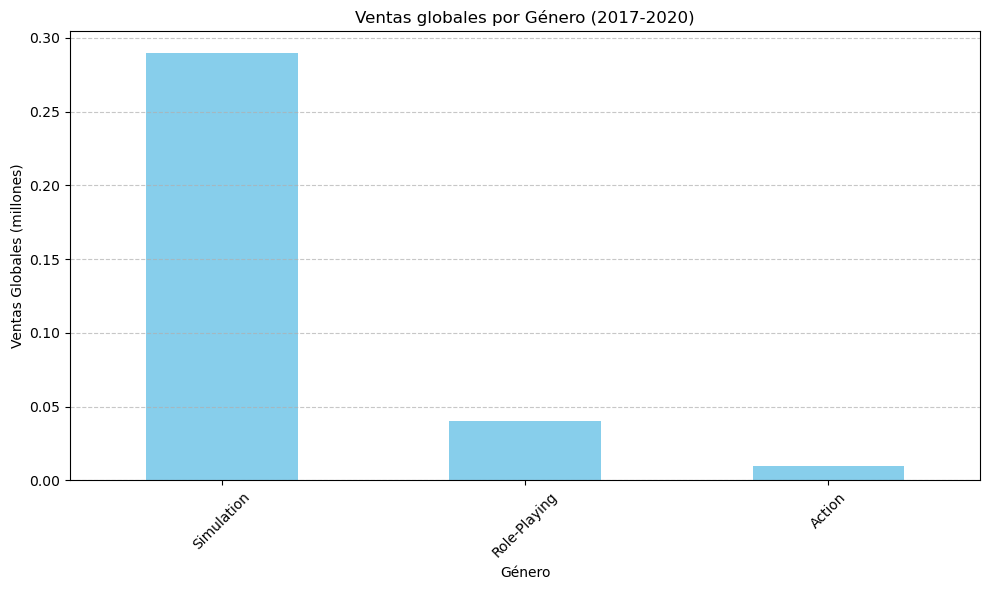

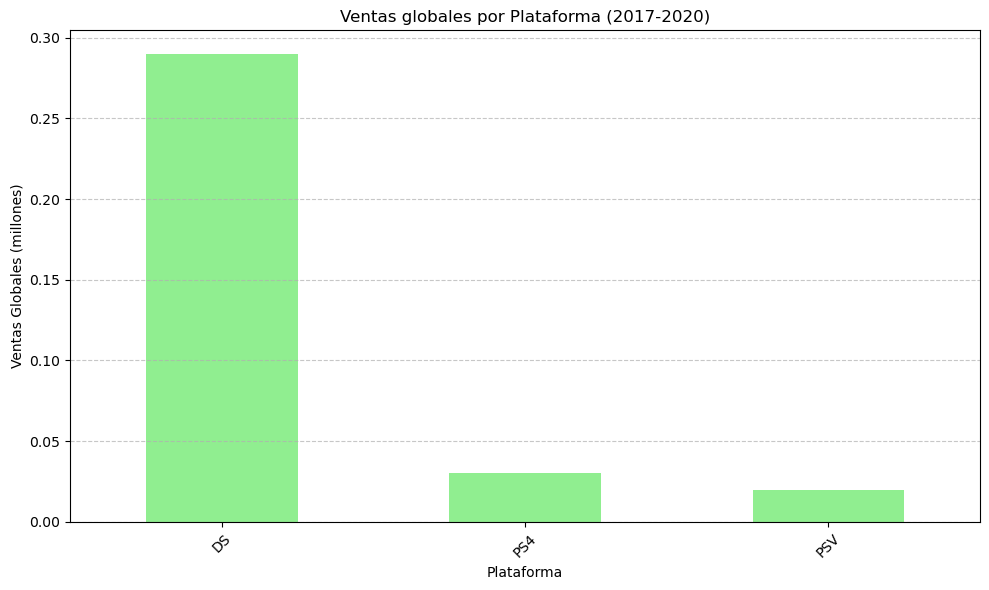

In [14]:
ultimos_4_anios = df[df['Year'] >= 2017]

# Agrupar y sumar ventas globales por género
crecimiento_genero = ultimos_4_anios.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Agrupar y sumar ventas globales por plataforma
crecimiento_plataforma = ultimos_4_anios.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Gráfico de barras para crecimiento por género
plt.figure(figsize=(10,6))
crecimiento_genero.plot(kind='bar', color='skyblue')
plt.title('Ventas globales por Género (2017-2020)')
plt.ylabel('Ventas Globales (millones)')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de barras para crecimiento por plataforma
plt.figure(figsize=(10,6))
crecimiento_plataforma.plot(kind='bar', color='lightgreen')
plt.title('Ventas globales por Plataforma (2017-2020)')
plt.ylabel('Ventas Globales (millones)')
plt.xlabel('Plataforma')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

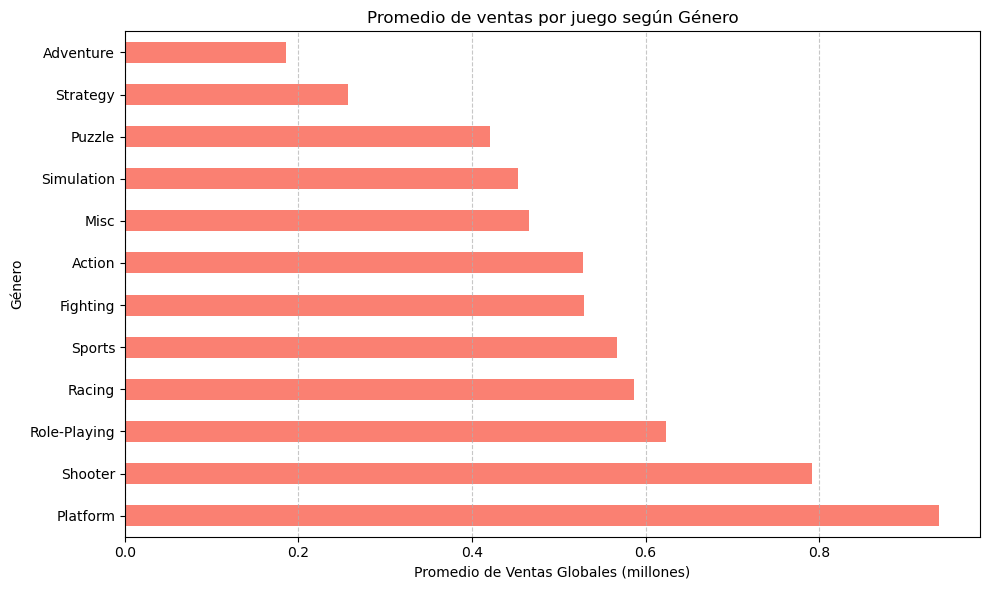

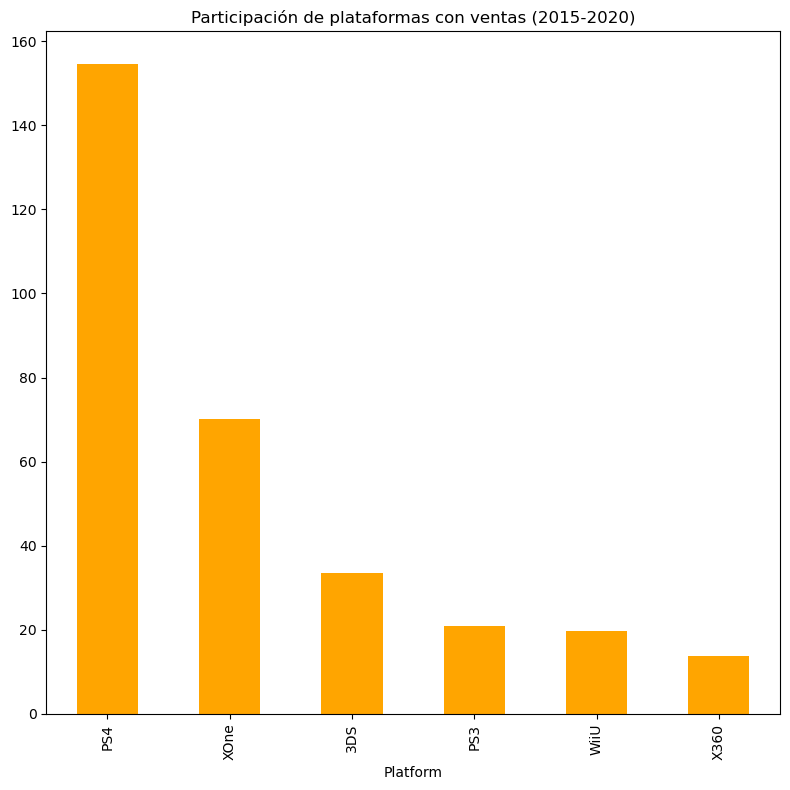

In [18]:
#Oportunidad de mercado

# Oportunida 1 Géneros poco explotados pero con potencial
media_ventas = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)

# Gráfico horizontal
plt.figure(figsize=(10,6))
media_ventas.plot(kind='barh', color='salmon')
plt.title('Promedio de ventas por juego según Género')
plt.xlabel('Promedio de Ventas Globales (millones)')
plt.ylabel('Género')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Oportunidad 2 Plataformas activas en años recientes

recientes = df[df['Year'] >= 2015]
plataformas_recientes = recientes.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Gráfico de pastel
plt.figure(figsize=(8,8))
plataformas_recientes.head(6).plot(kind='bar', color='orange')
plt.title('Participación de plataformas con ventas (2015-2020)')
plt.ylabel('')
plt.tight_layout()
plt.show()